## Kristen Shen First Draft: Flavors of E-cigarattes

In [ ]:
#set up

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
# import the file

In [24]:
df = pd.read_csv('e-cigarette-data.csv')
df.head()

,year,flavor,weighted_percent
0,2023,Tobacco-flavor,0.5
1,2023,Menthol,1.4
2,2023,Mint,2.0
3,2023,Spice,0.4
4,2023,Fruit,4.4


In [5]:
%%R

require('ggplot2')
require('readr')
require('dplyr')
require('tidyr')

Loading required package: ggplot2
Loading required package: readr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr


In [6]:
%%R

# Read data
df <- read_csv('e-cigarette-data.csv')
df

Rows: 31 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): flavor
dbl (2): year, weighted_percent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 31 × 3
    year flavor              weighted_percent
   <dbl> <chr>                          <dbl>
 1  2023 Tobacco-flavor                   0.5
 2  2023 Menthol                          1.4
 3  2023 Mint                             2  
 4  2023 Spice                            0.4
 5  2023 Fruit                            4.4
 6  2023 Chocolate                        0.4
 7  2023 Alcoholic drinks                 0.6
 8  2023 Non-alcoholic drink              0.8
 9  2023 Sweets                           2.4
10  2023 Unflavored                       0.8
# ℹ 21 more rows
# ℹ Use `print(n = ...)` to see more rows


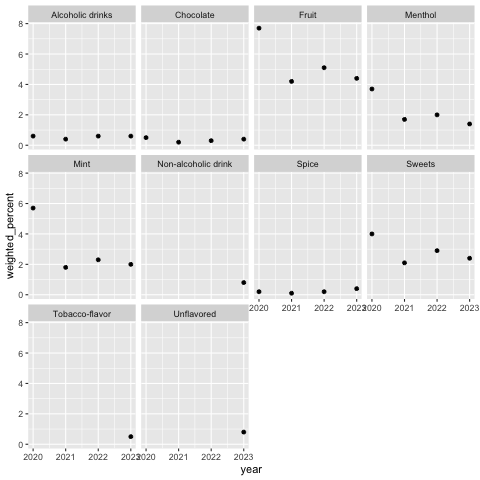

In [17]:
%%R 

# Plot + 
# Aesthetics
ggplot(df) +
    aes(y= weighted_percent, x=year) +geom_point() + facet_wrap(~flavor)

In [25]:
df.columns

Index(['year', 'flavor', 'weighted_percent'], dtype='object')

In [48]:
df_new = df[(df['flavor'] != 'Unflavored') & (df['flavor']!='Tobacco-flavor') & (df['flavor']!='Non-alcoholic drink')]
df_new

,year,flavor,weighted_percent
1,2023,Menthol,1.4
2,2023,Mint,2.0
3,2023,Spice,0.4
4,2023,Fruit,4.4
5,2023,Chocolate,0.4
6,2023,Alcoholic drinks,0.6
8,2023,Sweets,2.4
10,2022,Menthol,2.0
11,2022,Mint,2.3
12,2022,Spice,0.2


In [49]:
df_new.to_csv('new_flavor.csv', index=False)

In [50]:
df_new = pd.read_csv('new_flavor.csv')
df_new.head()

,year,flavor,weighted_percent
0,2023,Menthol,1.4
1,2023,Mint,2.0
2,2023,Spice,0.4
3,2023,Fruit,4.4
4,2023,Chocolate,0.4


In [51]:
%%R

# Read data
df_new <- read_csv('new_flavor.csv')
df_new

Rows: 28 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): flavor
dbl (2): year, weighted_percent

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 28 × 3
    year flavor           weighted_percent
   <dbl> <chr>                       <dbl>
 1  2023 Menthol                       1.4
 2  2023 Mint                          2  
 3  2023 Spice                         0.4
 4  2023 Fruit                         4.4
 5  2023 Chocolate                     0.4
 6  2023 Alcoholic drinks              0.6
 7  2023 Sweets                        2.4
 8  2022 Menthol                       2  
 9  2022 Mint                          2.3
10  2022 Spice                         0.2
# ℹ 18 more rows
# ℹ Use `print(n = ...)` to see more rows


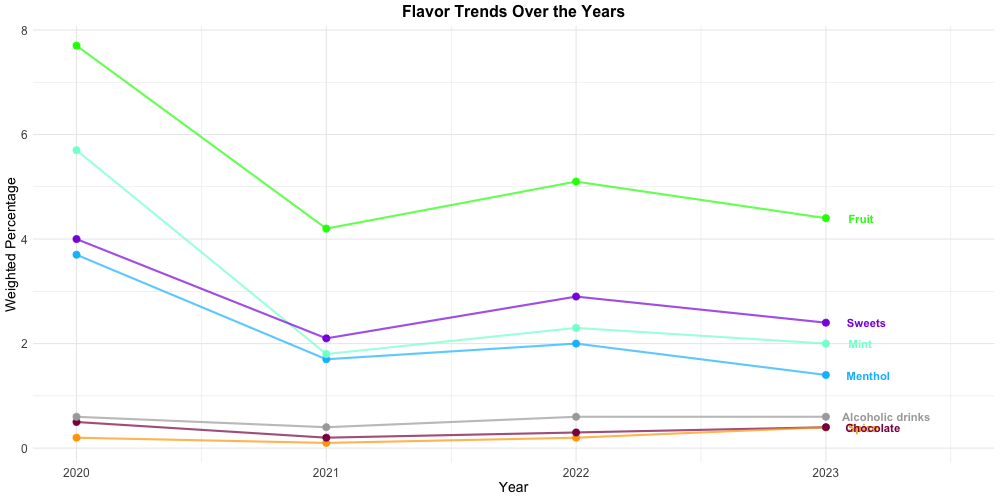

In [186]:
%%R -w 1000 -h 500
# Create a dataset for labeling (only keep the last year for each flavor)
df_labels <- df_new %>% group_by(flavor) %>% filter(year == max(year))

# Define custom colors
custom_colors <- c("Menthol" = "deepskyblue", "Mint" = "aquamarine1", 
                   "Fruit" = "green", "Spice" = "orange", 
                   "Chocolate" = "deeppink4", "Alcoholic drinks" = "darkgrey", "Sweets" = "blueviolet")

# Create the plot with labels on the chart
ggplot(df_new, aes(x = year, y = weighted_percent, color = flavor, group = flavor)) +
    geom_line(size = 1, alpha = 0.7) + 
    geom_point(size = 3) +              # Add scatter points
    scale_color_manual(values = custom_colors) +  # Apply custom colors
    geom_text(data = df_labels, aes(label = flavor), nudge_x=0.1, nudge_y=0, hjust = 0.1, size = 4, fontface = "bold") + 
    scale_x_continuous(limits = c(min(2020), max(2023) + 0.5))+
    labs(
        title = "Flavor Trends Over the Years",
        x = "Year",
        y = "Weighted Percentage"
    ) +
    theme_minimal() +
    theme(
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 14),
        legend.position = "none"
    )
